# Fundamentals of Modeling — Descriptive vs. Rule-Based

This notebook extends the lecture "Fundamentals of Modeling Part 2" (Complex Systems Modeling, TH Brandenburg).

It illustrates the difference between descriptive and rule-based modeling using simple examples.

## 1. Descriptive Modeling

Descriptive models capture what a system looks like or how it behaves at a given time.
They are based on empirical data or statistical relationships.

Examples:
- Regression or curve fitting
- Pattern recognition
- Image-based measurement

### Example: Observed Pendulum Motion


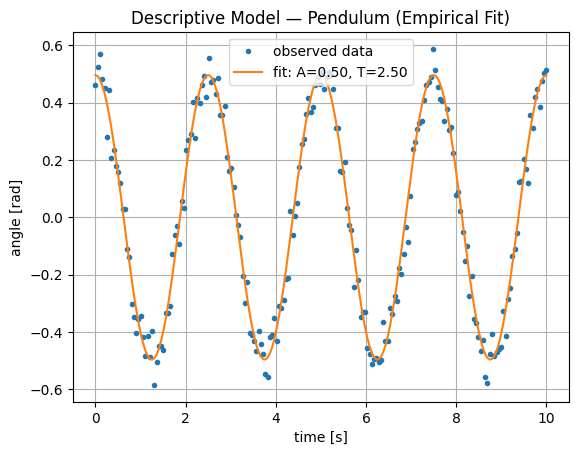

In [27]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate synthetic observation data for a pendulum-like motion
# The data roughly follows a cosine oscillation with small random noise.
t = np.linspace(0, 10, 200)  # time points [s]
theta_obs = 0.5 * np.cos(2 * np.pi * t / 2.5) + 0.05 * np.random.randn(len(t))

# Define the descriptive model (a cosine curve)
# Parameters:
#   A   - amplitude
#   T   - oscillation period
#   phi - phase shift
def model(t, A, T, phi):
    return A * np.cos(2 * np.pi * t / T + phi)

# Fit the model to the observed data using non-linear least squares
# p0 provides initial guesses for A, T, and phi
popt, _ = curve_fit(model, t, theta_obs, p0=[0.5, 2.5, 0])

# Plot the observed data and the fitted curve
plt.plot(t, theta_obs, '.', label='observed data')
plt.plot(t, model(t, *popt), '-', label=f'fit: A={popt[0]:.2f}, T={popt[1]:.2f}')
plt.xlabel("time [s]")
plt.ylabel("angle [rad]")
plt.legend()
plt.grid(True)
plt.title("Descriptive Model — Pendulum (Empirical Fit)")
plt.show()


This model reproduces the observed data but does not explain the underlying physical rule.

## 2. Rule-Based Modeling

Rule-based models define how a system changes over time.
They rely on underlying principles, such as physical laws or interaction rules.

Examples:
- Differential equations
- Cellular automata
- Agent-based models

### Example: Pendulum Dynamics (from Newton's Law)


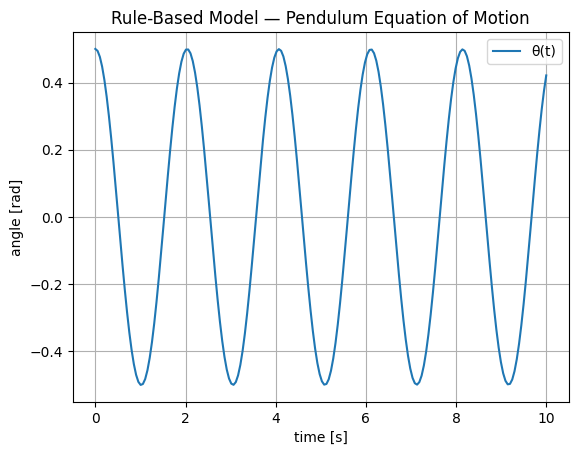

In [28]:
# Import ODE solver from SciPy
from scipy.integrate import solve_ivp

# Define physical parameters
g = 9.81   # gravitational acceleration [m/s²]
L = 1.0    # pendulum length [m]

# Define the system of differential equations
def pendulum(t, y):
    """
    y[0] = θ(t): angular displacement [rad]
    y[1] = dθ/dt: angular velocity [rad/s]
    Returns: [dθ/dt, d²θ/dt²]
    """
    theta, dtheta = y
    dtheta_dt = dtheta                       # time derivative of angle
    ddtheta_dt = -(g / L) * np.sin(theta)    # angular acceleration (nonlinear)
    return [dtheta_dt, ddtheta_dt]

# Define time points for evaluation
t_eval = np.linspace(0, 10, 200)

# Solve the ODE system
# Initial conditions: θ(0) = 0.5 rad (~28.6°), dθ/dt(0) = 0
sol = solve_ivp(pendulum, [0, 10], [0.5, 0], t_eval=t_eval)

# Plot the angular displacement over time
plt.plot(sol.t, sol.y[0], label="θ(t)")
plt.xlabel("time [s]")
plt.ylabel("angle [rad]")
plt.legend()
plt.grid(True)
plt.title("Rule-Based Model — Pendulum Equation of Motion")
plt.show()

This model explains *why* the pendulum moves as it does and allows predictions under new conditions.

## 3. Rule-Based Example: Lotka–Volterra Predator–Prey Model

A simple ecological model describing two interacting populations.

$$
\frac{dx}{dt} = \alpha x - \beta xy,\quad
\frac{dy}{dt} = \delta xy - \gamma y
$$


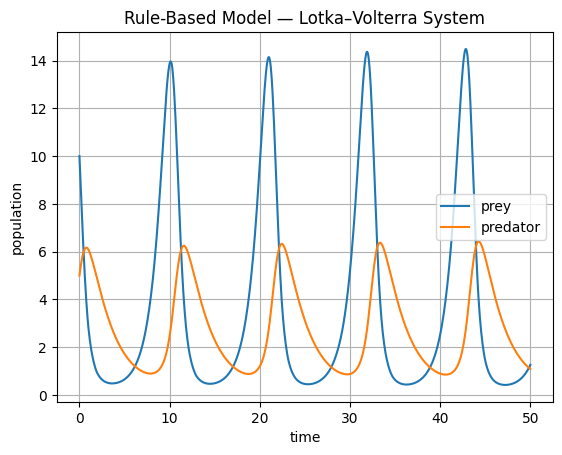

In [29]:
# Parameters for the predator–prey system
α = 1.1   # prey growth rate
β = 0.4   # predation rate coefficient
δ = 0.1   # reproduction rate of predators per consumed prey
γ = 0.4   # predator death rate

# Define the system of differential equations
def lotka_volterra(t, z):
    x, y = z  # x: prey population, y: predator population
    dxdt = α * x - β * x * y           # prey growth minus predation loss
    dydt = δ * x * y - γ * y           # predator growth minus natural death
    return [dxdt, dydt]

# Time span and evaluation points
t_eval = np.linspace(0, 50, 1000)

# Solve the ODE system using Runge–Kutta integration (solve_ivp)
# Initial conditions: 10 prey, 5 predators
sol = solve_ivp(lotka_volterra, [0, 50], [10, 5], t_eval=t_eval)

# Plot the time evolution of both populations
plt.plot(sol.t, sol.y[0], label="prey")
plt.plot(sol.t, sol.y[1], label="predator")
plt.xlabel("time")
plt.ylabel("population")
plt.legend()
plt.grid(True)
plt.title("Rule-Based Model — Lotka–Volterra System")
plt.show()


This model defines clear interaction rules between two components and explains oscillating population dynamics.


### Exercise: Exploring the Effect of Interaction Parameters in the Lotka–Volterra Model

The **Lotka–Volterra system** describes how two interacting populations — prey and predators — evolve over time according to a set of simple interaction rules.

Each parameter in the model has a clear biological interpretation:

| Parameter  | Meaning | Effect if Increased |
|------------|----------|--------------------|
| $ \alpha $ | Prey growth rate | Faster prey reproduction, stronger population growth |
| $ \beta $  | Predation rate | More efficient predation, prey decline faster |
| $ \delta $ | Predator reproduction rate per consumed prey | Predators grow faster when food is abundant |
| $ \gamma $ | Predator death rate | Predators die faster without prey |

**Your task:**

1. **Experiment with different parameter values** for \( \alpha, \beta, \delta, \gamma \).
   Start from the base set:
   $$
   \alpha = 1.1, \quad \beta = 0.4, \quad \delta = 0.1, \quad \gamma = 0.4
   $$
   Then modify one parameter at a time and re-run the simulation.

2. **Observe the resulting dynamics**:
   - How do the amplitudes and periods of oscillations change?
   - What happens if predation is too strong or too weak?
   - Under what conditions do both populations coexist stably, or one species goes extinct?

3. **Interpret the system behavior** in terms of *rule-based modeling*:
   - How do simple interaction rules lead to oscillatory or unstable population dynamics?
   - What qualitative patterns emerge from different parameter regimes?

This exercise illustrates how **parameter tuning in a rule-based model** captures a wide range of real-world ecological outcomes — from stable coexistence to collapse — using only four simple interaction coefficients.

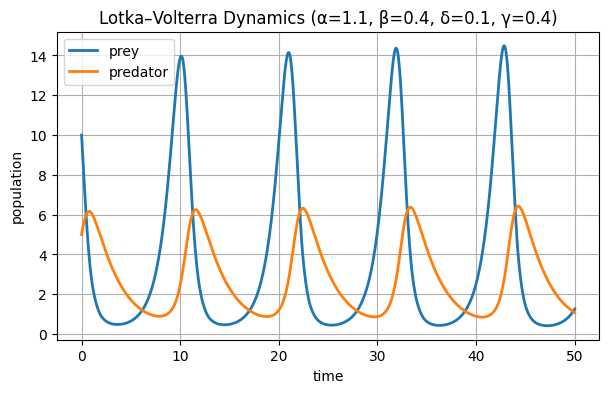

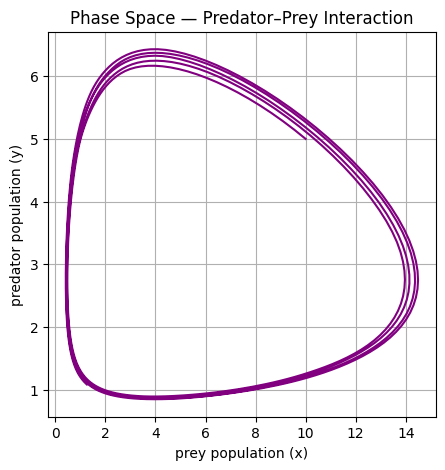

In [33]:
# ------------------------------------------------------------------------------
# Exploration Task: Effect of Interaction Parameters in the Lotka–Volterra Model
#
# The Lotka–Volterra system describes prey–predator interactions using four parameters:
#   α - prey growth rate
#   β - predation rate coefficient
#   δ - reproduction rate of predators per consumed prey
#   γ - predator death rate
#
# Your task:
# 1. Modify α, β, δ, and γ below to explore different ecological scenarios.
# 2. Observe how the oscillations and population balance change.
# 3. Identify parameter ranges where both species coexist, collapse, or oscillate stably.
# ------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- Parameters (students can adjust these) ------------------------------------
α = 1.1   # prey growth rate
β = 0.4   # predation rate coefficient
δ = 0.1   # predator reproduction per consumed prey
γ = 0.4   # predator natural death rate

# --- Define the Lotka–Volterra system of ODEs ---------------------------------
def lotka_volterra(t, z):
    x, y = z  # x = prey, y = predator
    dxdt = α * x - β * x * y           # prey growth minus loss due to predation
    dydt = δ * x * y - γ * y           # predator growth from food minus natural death
    return [dxdt, dydt]

# --- Simulation parameters -----------------------------------------------------
t_eval = np.linspace(0, 50, 1000)  # time points for evaluation
initial_conditions = [10, 5]       # [prey0, predator0]

# --- Solve the ODE system using a Runge–Kutta method ---------------------------
sol = solve_ivp(lotka_volterra, [0, 50], initial_conditions, t_eval=t_eval)

# --- Plot population dynamics --------------------------------------------------
plt.figure(figsize=(7, 4))
plt.plot(sol.t, sol.y[0], label="prey", linewidth=2)
plt.plot(sol.t, sol.y[1], label="predator", linewidth=2)
plt.xlabel("time")
plt.ylabel("population")
plt.title(f"Lotka–Volterra Dynamics (α={α}, β={β}, δ={δ}, γ={γ})")
plt.legend()
plt.grid(True)
plt.show()

# --- Phase plot: predator vs prey ---------------------------------------------
plt.figure(figsize=(5, 5))
plt.plot(sol.y[0], sol.y[1], color="purple")
plt.xlabel("prey population (x)")
plt.ylabel("predator population (y)")
plt.title("Phase Space — Predator–Prey Interaction")
plt.grid(True)
plt.show()

# ------------------------------------------------------------------------------
# Discussion questions:
# - How does changing α or γ affect long-term coexistence?
# - What happens if β (predation rate) is very high?
# - Can you find a parameter set where populations reach equilibrium instead of oscillating?
# ------------------------------------------------------------------------------


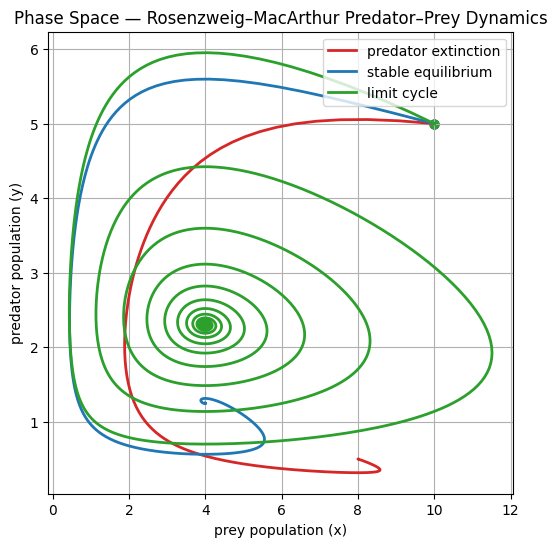

In [39]:
# ------------------------------------------------------------------------------
# Follow-up Exploration (Refined):
# Phase Space with Start Points and Clearly Visible Limit Cycle
#
# This version extends the Rosenzweig–MacArthur simulation to highlight:
#   - Start points of trajectories
#   - Distinct dynamical regimes (extinction, stable equilibrium, limit cycle)
#   - A sustained limit cycle (by using a higher prey carrying capacity K)
# ------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- Helper function for simulation -------------------------------------------
def simulate_RM(params, ic=(10, 5), tmax=400):
    α, β, δ, γ, K = params
    def f(t, z):
        x, y = z
        return [α * x * (1 - x / K) - β * x * y,
                δ * x * y - γ * y]
    t = np.linspace(0, tmax, 8000)
    sol = solve_ivp(f, [0, tmax], ic, t_eval=t, rtol=1e-8, atol=1e-10)
    return sol

# --- Parameter sets for three regimes -----------------------------------------
# 1. Predator extinction (high mortality, low carrying capacity)
p_extinct = (1.0, 0.4, 0.1, 0.8, 10.0)

# 2. Stable equilibrium (moderate parameters)
p_fixed = (1.0, 0.4, 0.1, 0.4, 8.0)

# 3. Limit cycle (high prey support, sustained oscillations)
p_cycle = (1.0, 0.4, 0.1, 0.4, 50.0)

# --- Run simulations ----------------------------------------------------------
s1 = simulate_RM(p_extinct)
s2 = simulate_RM(p_fixed)
s3 = simulate_RM(p_cycle)

# --- Plot phase-space trajectories --------------------------------------------
plt.figure(figsize=(6, 6))
plt.plot(s1.y[0], s1.y[1], color="tab:red", lw=2, label="predator extinction")
plt.plot(s2.y[0], s2.y[1], color="tab:blue", lw=2, label="stable equilibrium")
plt.plot(s3.y[0], s3.y[1], color="tab:green", lw=2, label="limit cycle")

# Mark starting points
plt.scatter(s1.y[0][0], s1.y[1][0], color="tab:red", marker="o", s=40)
plt.scatter(s2.y[0][0], s2.y[1][0], color="tab:blue", marker="o", s=40)
plt.scatter(s3.y[0][0], s3.y[1][0], color="tab:green", marker="o", s=40)

# Labels and grid
plt.xlabel("prey population (x)")
plt.ylabel("predator population (y)")
plt.title("Phase Space — Rosenzweig–MacArthur Predator–Prey Dynamics")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------------------------
# Notes:
# - Each point [x, y] represents a possible system state.
# - Dots mark starting conditions for the simulations.
# - Red curve → predator extinction (trajectory approaches x-axis).
# - Blue curve → stable fixed point (spiral attractor).
# - Green curve → sustained limit cycle (closed loop attractor).
# ------------------------------------------------------------------------------


## 4. Rule-Based Example: Heat Equation

Describes the diffusion of temperature in time and space.

$$
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}
$$


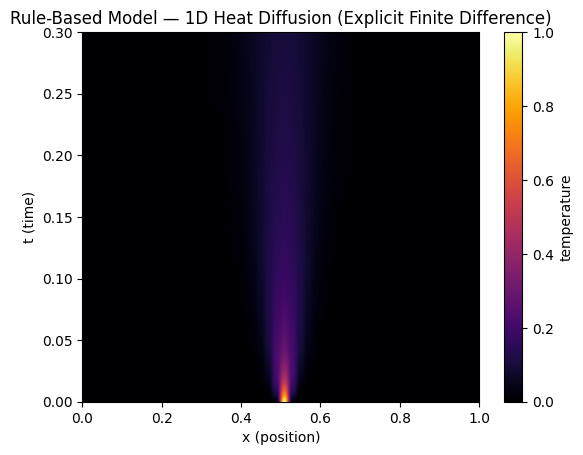

In [30]:
# ------------------------------------------------------------------------------
# Rule-Based Model: 1D Heat Diffusion (Explicit Finite Difference Scheme)
#
# Governing equation:
#     ∂T/∂t = α ∂²T/∂x²
#
# where:
#     T(x, t)  - temperature field
#     α        - thermal diffusivity [m²/s]
#
# The equation states that the rate of change of temperature over time
# is proportional to the curvature (second spatial derivative) of temperature.
# ------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# --- Grid and physical parameters ---------------------------------------------

nx = 50        # number of spatial grid points
nt = 300       # number of time steps
α = 0.01       # thermal diffusivity coefficient
dx = 1 / nx    # spatial step size (domain length normalized to 1)
dt = 0.001     # time step size

# --- Initialize the temperature field ----------------------------------------

T = np.zeros((nt, nx))   # T[n, i] stores temperature at time step n, position i
T[0, nx // 2] = 1        # initial condition: a single heat pulse in the center

# ------------------------------------------------------------------------------
# Discretization (Finite Difference Approximation)
#
# We discretize both time and space:
#   x_i   = i * Δx,      i = 0, 1, ..., nx-1
#   t_n   = n * Δt,      n = 0, 1, ..., nt-1
#
# The continuous derivatives are approximated as:
#
#   Time derivative (forward difference):
#       (∂T/∂t)_i^n  ≈  (T_i^{n+1} - T_i^n) / Δt
#
#   Second spatial derivative (central difference):
#       (∂²T/∂x²)_i^n  ≈  (T_{i+1}^n - 2*T_i^n + T_{i-1}^n) / Δx²
#
# Substituting these into the heat equation gives the **explicit update rule**:
#
#   T_i^{n+1} = T_i^n + α * Δt/Δx² * (T_{i+1}^n - 2*T_i^n + T_{i-1}^n)
#
# This rule updates each point in the spatial grid based on its neighbors
# at the previous time step.
#
# Important: The scheme is **conditionally stable**.
# Stability criterion (from Von Neumann analysis) to prevent oscillations or divergence:
#       α * Δt / Δx² ≤ 0.5
#
# ------------------------------------------------------------------------------

# --- Time integration loop ----------------------------------------------------

for n in range(nt - 1):
    # Apply the update rule to all interior points (exclude boundaries)
    T[n + 1, 1:-1] = T[n, 1:-1] + α * dt / dx**2 * (
        T[n, 2:] - 2 * T[n, 1:-1] + T[n, :-2]
    )

    # Optional: boundary conditions (here we assume insulated ends, i.e. no flux)
    # T[n+1, 0] = T[n+1, 1]
    # T[n+1, -1] = T[n+1, -2]

# ------------------------------------------------------------------------------
# Visualization: temperature evolution over time and space
# ------------------------------------------------------------------------------

plt.imshow(
    T,
    extent=[0, 1, 0, nt * dt],
    origin="lower",
    aspect="auto",
    cmap="inferno"
)
plt.colorbar(label="temperature")
plt.xlabel("x (position)")
plt.ylabel("t (time)")
plt.title("Rule-Based Model — 1D Heat Diffusion (Explicit Finite Difference)")
plt.show()


This rule-based model represents how local temperature differences drive diffusion.


### Exercise: Exploring the Effect of the Diffusion Coefficient

In the previous example, we modeled **1D heat diffusion** using an explicit finite-difference scheme.
The key physical parameter in the heat equation is the **diffusion coefficient (α)**, which determines how fast temperature gradients are smoothed out over time.

In this exercise, you will:

1. **Vary the diffusion coefficient α** (for example, 0.001, 0.01, 0.05, 0.1).
2. **Observe the resulting heat propagation** in a heat map and as temperature profiles at selected time steps.
3. **Compare the results**:
   - How does increasing α change the shape and rate of diffusion?
   - At what point does the simulation become unstable?
   - How does this relate to the numerical stability condition \( \alpha \, \Delta t / \Delta x^2 \le 0.5 \)?

This short experiment helps you connect **the physical meaning of α** (material property) with **its numerical implications** (stability and convergence of the explicit scheme).


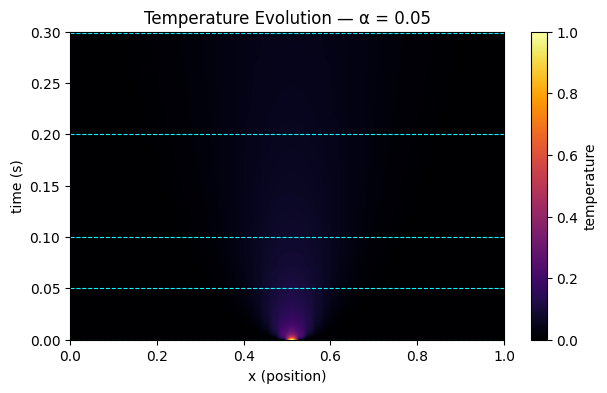

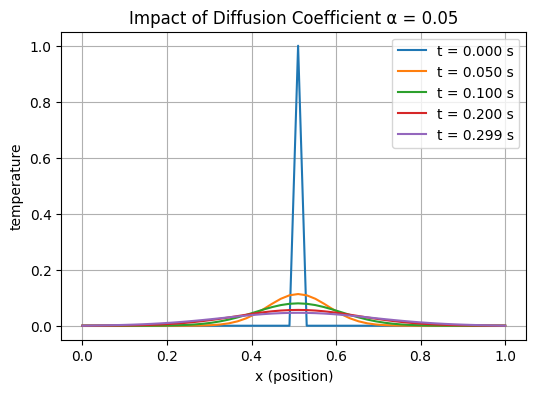

In [31]:
# ------------------------------------------------------------------------------
# Exploration Task: Effect of Diffusion Coefficient (α)
#
# The diffusion coefficient α controls how fast heat spreads through the material.
# - Larger α → faster smoothing of temperature gradients.
# - Smaller α → slower diffusion, sharper peaks remain longer.
#
# Your task:
# 1. Change α (e.g. 0.001, 0.01, 0.05, 0.1)
# 2. Observe how the heat pulse evolves in both the heat map and line plots.
# 3. Note when the simulation becomes unstable (α * dt / dx² > 0.5).
# ------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# --- Parameters (modify α here) -----------------------------------------------
nx = 50
nt = 300
α = 0.05        # try 0.001, 0.01, 0.05, 0.1
dx = 1 / nx
dt = 0.001

# --- Initialization -----------------------------------------------------------
T = np.zeros((nt, nx))
T[0, nx // 2] = 1  # initial central heat pulse

# --- Time integration ---------------------------------------------------------
for n in range(nt - 1):
    T[n + 1, 1:-1] = T[n, 1:-1] + α * dt / dx**2 * (
        T[n, 2:] - 2 * T[n, 1:-1] + T[n, :-2]
    )

# --- Plot 1: Heat map of temperature evolution --------------------------------
plt.figure(figsize=(7, 4))
plt.imshow(
    T,
    extent=[0, 1, 0, nt * dt],
    origin="lower",
    aspect="auto",
    cmap="inferno"
)
plt.colorbar(label="temperature")
plt.xlabel("x (position)")
plt.ylabel("time (s)")
plt.title(f"Temperature Evolution — α = {α}")

# Mark selected time slices on the heat map
times_to_plot = [0, 50, 100, 200, 299]
for n in times_to_plot:
    t_line = n * dt
    plt.axhline(y=t_line, color="cyan", linestyle="--", linewidth=0.8)

plt.show()

# --- Plot 2: Temperature profiles at selected times ---------------------------
plt.figure(figsize=(6, 4))
for n in times_to_plot:
    plt.plot(np.linspace(0, 1, nx), T[n, :], label=f"t = {n*dt:.3f} s")

plt.xlabel("x (position)")
plt.ylabel("temperature")
plt.title(f"Impact of Diffusion Coefficient α = {α}")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------------------------

# Discussion questions:
# - How does increasing α affect the rate of diffusion?
# - Which α values make the simulation unstable (α * Δt / Δx² > 0.5)?
# - Why do the profiles flatten over time?
# - How does the shape of the heat map relate to the physical diffusion process?


## 5. Rule-Based Example: Sierpiński Carpet

A geometric recursion showing how complexity arises from simple rules.


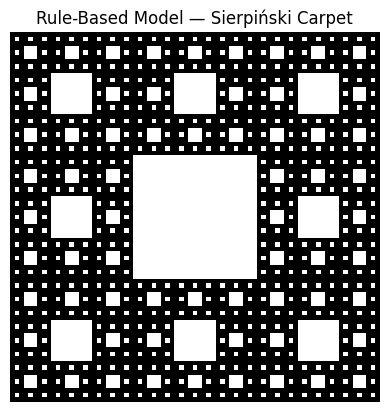

In [32]:
def sierpinski_carpet(n):
    if n == 0:
        return np.ones((1,1))
    smaller = sierpinski_carpet(n-1)
    top = np.hstack([smaller, smaller, smaller])
    middle = np.hstack([smaller, np.zeros_like(smaller), smaller])
    bottom = np.hstack([smaller, smaller, smaller])
    return np.vstack([top, middle, bottom])

carpet = sierpinski_carpet(4)
plt.imshow(carpet, cmap="binary")
plt.axis("off")
plt.title("Rule-Based Model — Sierpiński Carpet")
plt.show()

## 6. Comparison

| Type | Goal | Example | Strength | Limitation |
|------|------|----------|-----------|-------------|
| Descriptive | Capture what is | Pendulum data fit | Matches data | No prediction |
| Rule-Based | Explain how it changes | Differential equations | Predictive | Requires assumptions |


## 7. Applications

- Porous materials: recursive void formation or erosion patterns
- Urban growth: subdivision and central reservation of land
- Biological systems: predator–prey cycles
- Thermal transport: diffusion processes


## 8. Reflection Questions

1. What was the simple rule in each example?
2. What kind of pattern or dynamic behavior emerged?
3. Could you have predicted the outcome just from the rule?
4. How does this relate to "local simple rules → global complex behavior"?
5. How could these abstractions be linked to real-world systems (porous materials, cities, networks)?
6. How can we move from descriptive observations to identifying underlying rules?


## 9. Summary

Descriptive models depict what is observed.
Rule-based models define how systems evolve.
Scientific modeling often alternates between both — observation, rule formulation, prediction, and refinement.
